# Bank of Canada Monetary Policy Analysis

* This project aims to provide a comprehensive analys of the Bank of Canada monetary policy tools. 
* The notebook uses the data available as CSV files from the Bank of Canada website. I, on purpose, avoid using the BOC APIs and Bloomberg to make it accessable to most users since:

    - Most financial insitutions restrict the use of external APIs, however they allow downloading CSV data files from safe websites such as bankofcanada.ca
    - Most indivudual users not employed by financial institutinos do not have access to Bloomberg, however they can easily download CSV data files from the BoC website
    
* The notebook is using the folloing CSV files from the BoC website:
    - **CORRA.csv** - updated every day at 9:00 am at https://www.bankofcanada.ca/rates/interest-rates/corra/
    - **Sec_Repo.csv** - updated every day at 10:15 am at https://www.bankofcanada.ca/markets/market-operations-liquidity-provision/market-operations-programs-and-facilities/securities-repo-operations/
    - **money_market.csv** - updated daily at https://www.bankofcanada.ca/rates/interest-rates/money-market-yields/
    - **bond_yields_all.csv** - updated daily at https://www.bankofcanada.ca/rates/interest-rates/canadian-bonds/
    - **tbill_all.csv** - updated daily at https://www.bankofcanada.ca/rates/interest-rates/t-bill-yields/    
        
* For this notebook to work, the above files must be downloaded and saved as CSV (Comma delimited) (*.csv) files in the same folder as this notebook.     
* To refresh the data, click on each of the above linkes, lockate "Data available as: CSV, JSON and XML", right click on "CSV" and save the file withiout changing its name in the same location as this notebook.
 

## Import Dependencies

In [58]:
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1. Canadian Overnight Repo Rate Average (CORRA)

### Import Data

In [59]:
corra_raw=pd.read_csv(Path("CORRA.csv"), index_col = "date", infer_datetime_format=True, parse_dates=True, skiprows = 27)
corra_df=corra_raw.copy().dropna()
# corra_df.tail()

In [60]:
corra=pd.DataFrame()
corra['Corra']=corra_df['AVG.INTWO']
corra['Total Volume']=corra_df['CORRA_TOTAL_VOLUME']
corra['Trimmed Volume']=corra_df['CORRA_TRIMMED_VOLUME']
corra['Number of Submitters']=corra_df['CORRA_NUMBER_OF_SUBMITTERS']
corra['Rate at Trim']=corra_df['CORRA_RATE_AT_TRIM']
corra['Rate at 5% Perc']=corra_df['CORRA_RATE_AT_PERCENTILE_5']
corra['Rate at 25% Perc']=corra_df['CORRA_RATE_AT_PERCENTILE_25']
corra['Rate at 75% Perc']=corra_df['CORRA_RATE_AT_PERCENTILE_75']
corra['Rate at 95% Perc']=corra_df['CORRA_RATE_AT_PERCENTILE_95']
corra.index = pd.to_datetime(corra.index, format = '%m/%d/%Y')
corra.tail()

,Corra,Total Volume,Trimmed Volume,Number of Submitters,Rate at Trim,Rate at 5% Perc,Rate at 25% Perc,Rate at 75% Perc,Rate at 95% Perc
date,,,,,,,,,
2021-07-02,0.16,2.394038e+10,1.795529e+10,13.0,0.15,0.15,0.16,0.18,0.20
2021-07-05,0.16,2.040014e+10,1.530010e+10,13.0,0.15,0.15,0.16,0.18,0.22
2021-07-06,0.18,2.128549e+10,1.596412e+10,12.0,0.15,0.15,0.18,0.19,0.22
2021-07-07,0.17,2.001603e+10,1.501202e+10,12.0,0.16,0.16,0.16,0.18,0.20
2021-07-08,0.20,1.545484e+10,1.159113e+10,14.0,0.17,0.17,0.18,0.20,0.21


In [61]:
corra_rates=corra.drop(columns=['Total Volume','Trimmed Volume','Number of Submitters'])
corra_rates.tail()

,Corra,Rate at Trim,Rate at 5% Perc,Rate at 25% Perc,Rate at 75% Perc,Rate at 95% Perc
date,,,,,,
2021-07-02,0.16,0.15,0.15,0.16,0.18,0.20
2021-07-05,0.16,0.15,0.15,0.16,0.18,0.22
2021-07-06,0.18,0.15,0.15,0.18,0.19,0.22
2021-07-07,0.17,0.16,0.16,0.16,0.18,0.20
2021-07-08,0.20,0.17,0.17,0.18,0.20,0.21


### CORRA

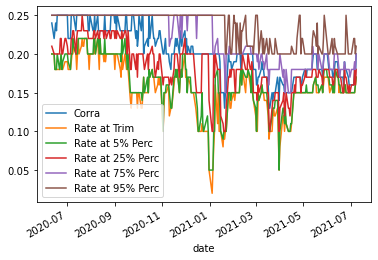

In [62]:
corra_rates=corra.drop(columns=['Total Volume','Trimmed Volume','Number of Submitters'])
corra_rates.plot()

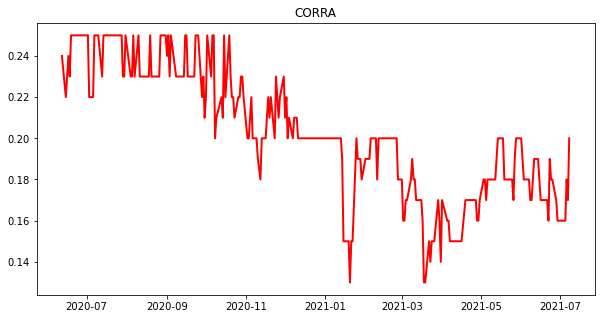

In [63]:
plt.figure(figsize=(10,5))
ax = plt.axes()

plt.plot(corra_rates['Corra'], linewidth = 2, color='red')
plt.title('CORRA')
plt.show()

### CORRA and Rates at Different Percentiles

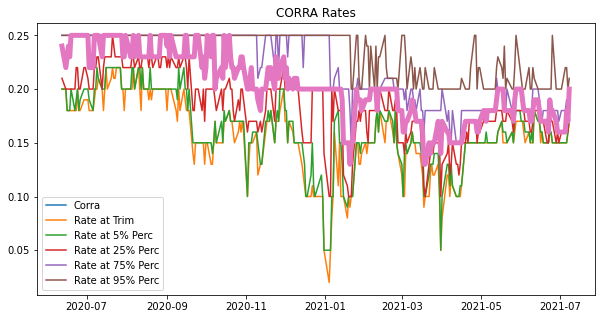

In [64]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(corra_rates)
plt.plot(corra_rates['Corra'], linewidth = 5)
plt.title('CORRA Rates')
plt.legend(corra_rates)
plt.show()

### CORRA Total and Trimmed Volumes

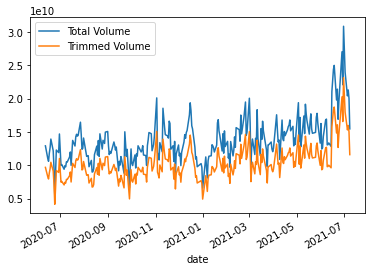

In [65]:
corra_volume=corra.drop(columns=['Corra','Number of Submitters','Rate at Trim','Rate at 5% Perc','Rate at 25% Perc','Rate at 75% Perc','Rate at 95% Perc'])
corra_volume.plot()

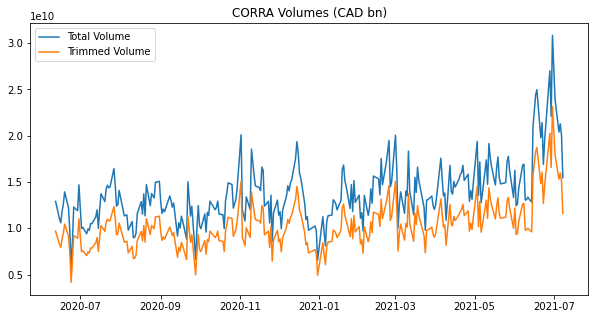

In [66]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(corra_volume)
plt.title('CORRA Volumes (CAD bn)')
plt.legend(corra_volume)
plt.show()

### Number of Submitters to CORRA

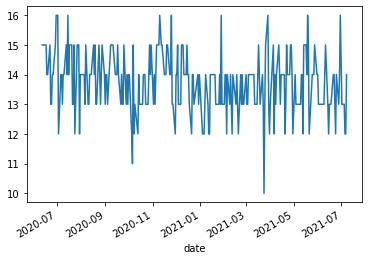

In [67]:
corra_n_sub=corra['Number of Submitters']
corra_n_sub.plot()

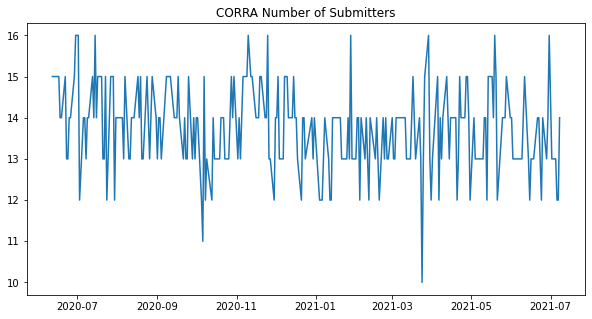

In [68]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(corra_n_sub)
plt.title('CORRA Number of Submitters')
plt.show()

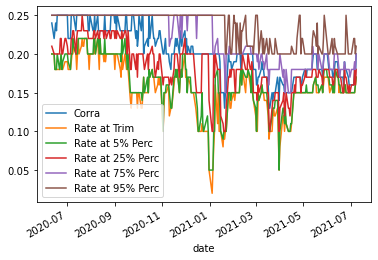

In [69]:
corra_rates=corra.drop(columns=['Total Volume','Trimmed Volume','Number of Submitters'])
corra_rates.plot()

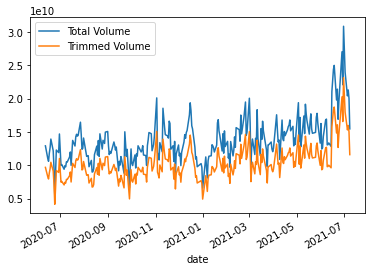

In [70]:
corra_volume=corra.drop(columns=['Corra','Number of Submitters','Rate at Trim','Rate at 5% Perc','Rate at 25% Perc','Rate at 75% Perc','Rate at 95% Perc'])
corra_volume.plot()

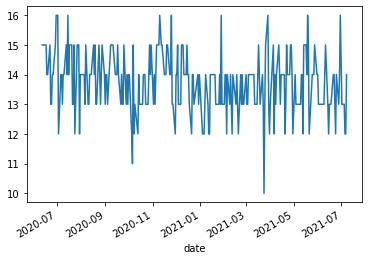

In [71]:
corra_n_sub=corra['Number of Submitters']
corra_n_sub.plot()

# 2. Securities Repo Operations (SRO)

### Import Data

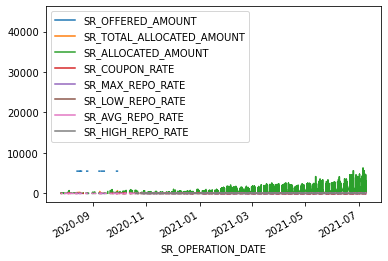

In [72]:
sro_df=pd.read_csv(Path("Sec_Repo.csv"), index_col = "SR_OPERATION_DATE", infer_datetime_format=True, parse_dates=True, skiprows = 29)
sro_df.plot()

### SRO Amount

In [73]:
sro_new = sro_df.drop(columns=['sr_id', 'SR_MATURITY_DATE',
                              'SR_ALLOCATED_AMOUNT',
                              'SR_SEC_MATURITY_DATE',
                              'SR_ISIN',
                              'SR_COUPON_RATE',
                              'SR_LOW_REPO_RATE',
                              'SR_AVG_REPO_RATE',
                              'SR_HIGH_REPO_RATE',
                              'SR_SECURITY_TYPE',
                              'SR_MAX_REPO_RATE']).dropna().sort_values(by='SR_OPERATION_DATE', ascending=True).reset_index()

sro=sro_new.rename(columns={'SR_OPERATION_DATE': 'Date', 'SR_OFFERED_AMOUNT': 'Amount Offered', 'SR_TOTAL_ALLOCATED_AMOUNT': 'Amount Allocated'}).set_index('Date')
sro.tail()

,Amount Offered,Amount Allocated
Date,,
2021-07-05,44000.0,28865.0
2021-07-06,44000.0,30363.0
2021-07-07,44000.0,27952.0
2021-07-08,44000.0,27633.0
2021-07-09,44000.0,25841.0


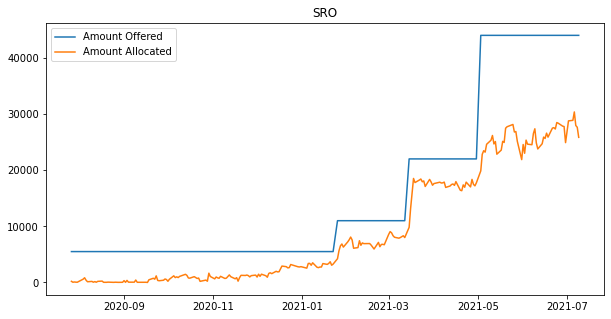

In [74]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(sro)
# plt.plot(corra_rates['Corra'], linewidth = 5)
plt.title('SRO')
plt.legend(sro)
plt.show()

### SRO Utilization

In [75]:
sro_util=pd.DataFrame()
sro_util['SRO % Utilisation'] = sro['Amount Allocated'] / sro['Amount Offered']
sro_util['5-Day Moving Average'] = sro_util['SRO % Utilisation'].rolling(window=5).mean()
sro_util.tail()

,SRO % Utilisation,5-Day Moving Average
Date,,
2021-07-05,0.656023,0.627895
2021-07-06,0.690068,0.639382
2021-07-07,0.635273,0.640245
2021-07-08,0.628023,0.652668
2021-07-09,0.587295,0.639336


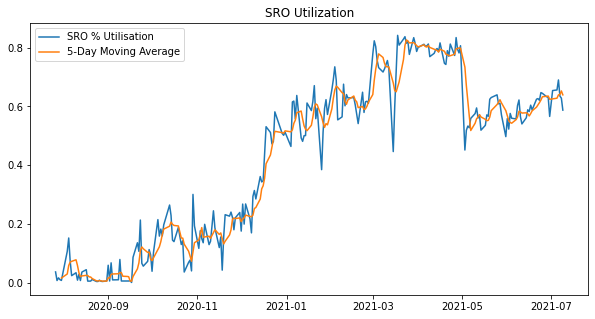

In [76]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(sro_util)
# plt.plot(corra_rates['Corra'], linewidth = 5)
plt.title('SRO Utilization')
plt.legend(sro_util)
plt.show()

### SRO Max Rate

In [77]:
sro_max_rate = pd.DataFrame()
sro_max_rate=sro_df.drop(columns=['sr_id', 'SR_MATURITY_DATE',
                                  'SR_OFFERED_AMOUNT', 'SR_TOTAL_ALLOCATED_AMOUNT',
                              'SR_ALLOCATED_AMOUNT',
                              'SR_SEC_MATURITY_DATE',
                              'SR_ISIN',
                              'SR_COUPON_RATE',
                              'SR_LOW_REPO_RATE',
                              'SR_AVG_REPO_RATE',
                              'SR_HIGH_REPO_RATE',
                              'SR_SECURITY_TYPE'
                              ]).dropna().sort_values(by='SR_OPERATION_DATE', ascending=True).reset_index()

sro_max_rate=sro_max_rate.rename(columns={'SR_OPERATION_DATE': 'Date', 'SR_MAX_REPO_RATE': 'SRO Max Rate'}).set_index('Date')

sro_max_rate.tail()

,SRO Max Rate
Date,
2021-07-05,0.15
2021-07-06,0.15
2021-07-07,0.15
2021-07-08,0.15
2021-07-09,0.15


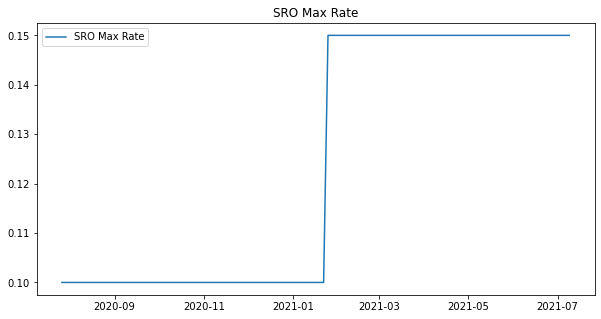

In [78]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(sro_max_rate)
# plt.plot(corra_rates['Corra'], linewidth = 5)
plt.title('SRO Max Rate')
plt.legend(sro_max_rate)
plt.show()

### Max SRO Rate and CORRA

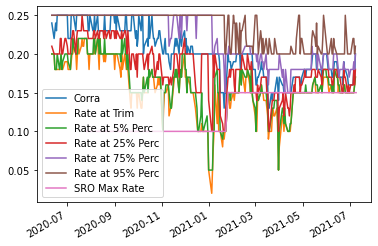

In [79]:
corra_sro = pd.concat([corra_rates, sro_max_rate], axis = 1, join = 'outer')
corra_sro.plot()

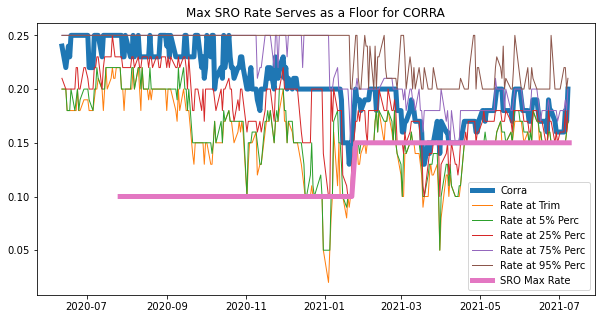

In [80]:
plt.figure(figsize=(10,5))
ax = plt.axes()
# plt.plot(corra_sro)
plt.plot(corra_sro['Corra'], linewidth = 5)
plt.plot(corra_sro['Rate at Trim'], linewidth = 1)
plt.plot(corra_sro['Rate at 5% Perc'], linewidth = 1)
plt.plot(corra_sro['Rate at 25% Perc'], linewidth = 1)
plt.plot(corra_sro['Rate at 75% Perc'], linewidth = 1)
plt.plot(corra_sro['Rate at 95% Perc'], linewidth = 1)
plt.plot(corra_sro['SRO Max Rate'], linewidth = 5)
plt.title('Max SRO Rate Serves as a Floor for CORRA')
plt.legend(corra_sro)
plt.show()

# 3. Money Market Yields

### Import Data

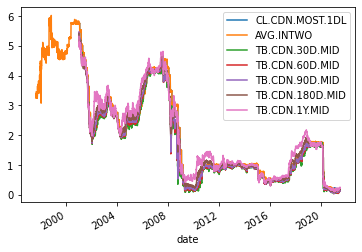

In [81]:
money_market_df=pd.read_csv(Path("money_market.csv"), index_col = "date", infer_datetime_format=True, parse_dates=True, skiprows = 23)
money_market_df.plot()

### T-Bill Yields

In [82]:
mm=money_market_df.drop(columns=['CL.CDN.MOST.1DL'])

mm=mm.rename(columns={'AVG.INTWO': 'Corra', 'TB.CDN.30D.MID': '1M T-Bills', 
                      'TB.CDN.60D.MID': '2M T-Bills','TB.CDN.90D.MID': '3M T-Bills',
                      'TB.CDN.180D.MID': '6M T-Bills','TB.CDN.1Y.MID': '1Y T-Bills'})

mm.tail()

,Corra,1M T-Bills,2M T-Bills,3M T-Bills,6M T-Bills,1Y T-Bills
date,,,,,,
2021-07-02,0.16,0.14,0.13,0.14,0.17,0.22
2021-07-05,0.16,0.14,0.14,0.15,0.17,0.24
2021-07-06,0.18,0.15,0.14,0.15,0.19,0.24
2021-07-07,0.17,0.16,0.15,0.16,0.19,0.25
2021-07-08,0.20,0.17,0.14,0.14,0.18,0.24


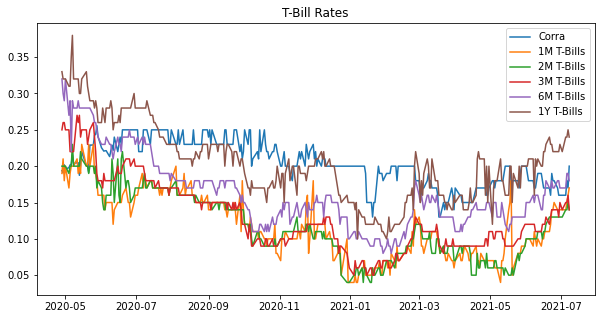

In [83]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(mm.tail(300))
plt.title('T-Bill Rates')
plt.legend(mm)
plt.show()

### O/N Money Market Financing Rate (OMMFR)

In [84]:
onr=money_market_df.drop(columns=['TB.CDN.30D.MID', 
                      'TB.CDN.60D.MID','TB.CDN.90D.MID',
                      'TB.CDN.180D.MID','TB.CDN.1Y.MID'])

onr=onr.rename(columns={'AVG.INTWO': 'Corra', 'CL.CDN.MOST.1DL': 'O/N Money Market Financing Rate'})

onr.tail()

,O/N Money Market Financing Rate,Corra
date,,
2021-07-02,0.1999,0.16
2021-07-05,0.1828,0.16
2021-07-06,0.1665,0.18
2021-07-07,0.1714,0.17
2021-07-08,NaN,0.20


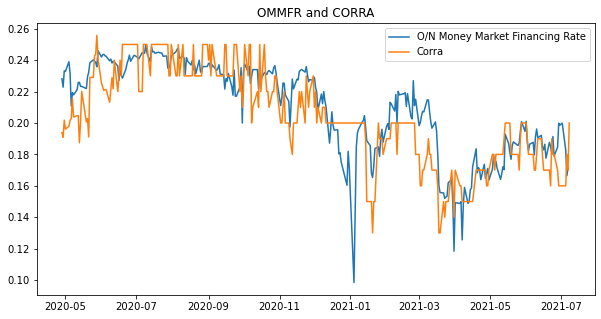

In [85]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(onr.tail(300))
plt.title('OMMFR and CORRA')
plt.legend(onr)
plt.show()

# 4. Goverment of Canada Bond Yields

### Import Data

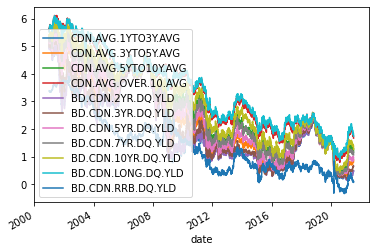

In [86]:
bond_yields_df=pd.read_csv(Path("bond_yields_all.csv"), index_col = "date", infer_datetime_format=True, parse_dates=True, skiprows = 27)
bond_yields_df.plot()

### Benchmark Bond Yields

In [87]:
by=bond_yields_df.drop(columns=['CDN.AVG.1YTO3Y.AVG','CDN.AVG.3YTO5Y.AVG', 'CDN.AVG.5YTO10Y.AVG', 'CDN.AVG.OVER.10.AVG', 'BD.CDN.LONG.DQ.YLD', 'BD.CDN.RRB.DQ.YLD'])

by=by.rename(columns={'BD.CDN.2YR.DQ.YLD': '2Y', 'BD.CDN.3YR.DQ.YLD': '3Y', 
                      'BD.CDN.5YR.DQ.YLD': '5Y','BD.CDN.7YR.DQ.YLD': '7Y',
                      'BD.CDN.10YR.DQ.YLD': '10Y'})

by.tail()

,2Y,3Y,5Y,7Y,10Y
date,,,,,
2021-07-02,0.45,0.65,0.96,1.14,1.37
2021-07-05,0.46,0.67,0.99,1.17,1.40
2021-07-06,0.46,0.66,0.95,1.12,1.32
2021-07-07,0.48,0.66,0.93,1.10,1.29
2021-07-08,0.48,0.65,0.89,1.06,1.26


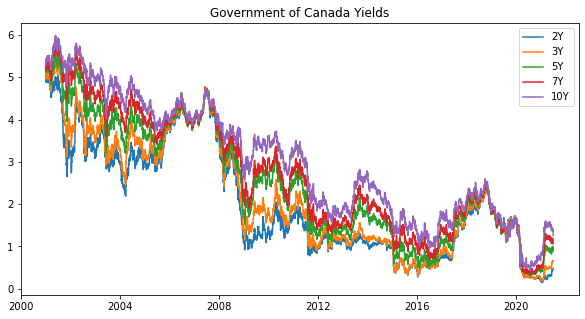

In [88]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(by)
plt.title('Government of Canada Yields')
plt.legend(by)
plt.show()

### Government of Canada Yield Spreads

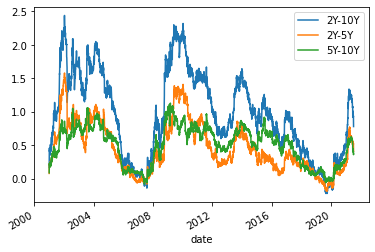

In [89]:
curve = pd.DataFrame()
curve['2Y-10Y'] = by['10Y'] - by['2Y']
curve['2Y-5Y'] = by['5Y'] - by['2Y']
curve['5Y-10Y'] = by['10Y'] - by['5Y']
curve.plot()

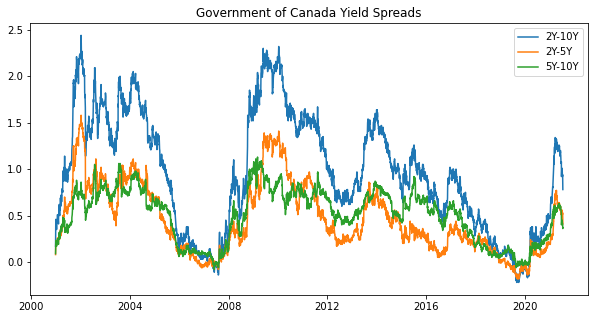

In [90]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(curve)
plt.title('Government of Canada Yield Spreads')
plt.legend(curve)
plt.show()

# 5. FX Rates

# Import Data

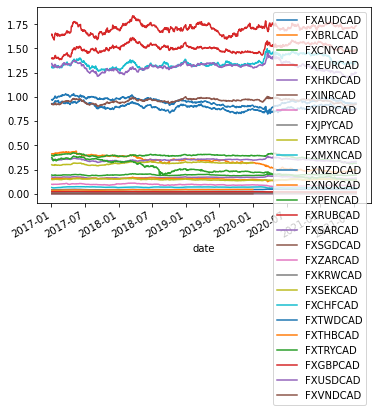

In [115]:
fx_rates_df=pd.read_csv(Path("FX_RATES_DAILY.csv"), index_col = "date", infer_datetime_format=True, parse_dates=True, skiprows = 39)
fx_rates_df.plot()

In [122]:
fx_rates_df.tail()

,FXAUDCAD,FXBRLCAD,FXCNYCAD,FXEURCAD,FXHKDCAD,FXINRCAD,FXIDRCAD,FXJPYCAD,FXMYRCAD,FXMXNCAD,...,FXZARCAD,FXKRWCAD,FXSEKCAD,FXCHFCAD,FXTWDCAD,FXTHBCAD,FXTRYCAD,FXGBPCAD,FXUSDCAD,FXVNDCAD
date,,,,,,,,,,,,,,,,,,,,,
2021-07-08,0.9321,0.2385,0.1932,1.4855,0.1614,0.01677,0.000086,0.01143,NaN,0.06268,...,0.08749,0.001091,0.1460,1.3697,0.04475,NaN,0.1443,1.7269,1.2540,NaN
2021-07-09,0.9333,0.2372,0.1926,1.4806,0.1606,0.01674,0.000086,0.01133,NaN,0.06276,...,0.08756,0.001090,0.1454,1.3637,0.04457,NaN,0.1440,1.7290,1.2476,NaN
2021-07-12,0.9326,0.2394,0.1926,1.4789,0.1606,0.01672,0.000086,0.01131,NaN,0.06275,...,0.08650,0.001088,0.1453,1.3624,0.04453,NaN,0.1444,1.7304,1.2471,NaN
2021-07-13,0.9331,0.2419,0.1934,1.4773,0.1611,0.01678,0.000087,0.01133,NaN,0.06250,...,0.08541,0.001090,0.1449,1.3636,0.04466,NaN,0.1454,1.7307,1.2514,NaN
2021-07-14,0.9343,0.2455,0.1933,1.4778,0.1609,0.01677,0.000086,0.01135,NaN,0.06279,...,0.08584,0.001090,0.1449,1.3648,0.04464,NaN,0.1454,1.7327,1.2497,NaN


### Selected FX Rates vs Canadian Dollar

### USDCAD

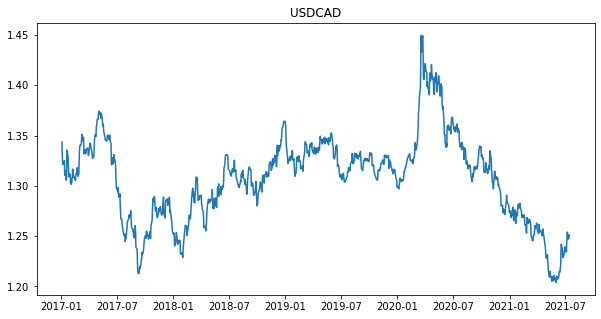

In [126]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXUSDCAD'])
plt.title('USDCAD')
plt.show()

### AUDCAD

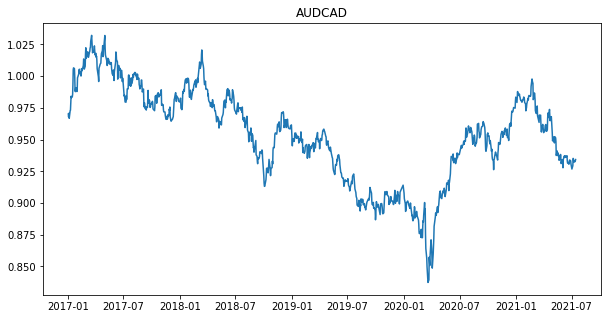

In [127]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXAUDCAD'])
plt.title('AUDCAD')
plt.show()

In [ ]:
### EURCAD

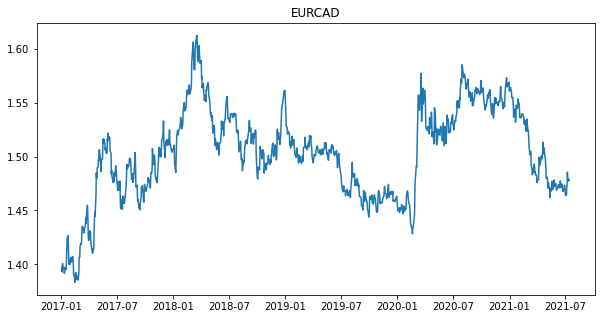

In [128]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXEURCAD'])
plt.title('EURCAD')
plt.show()

### GBPCAD

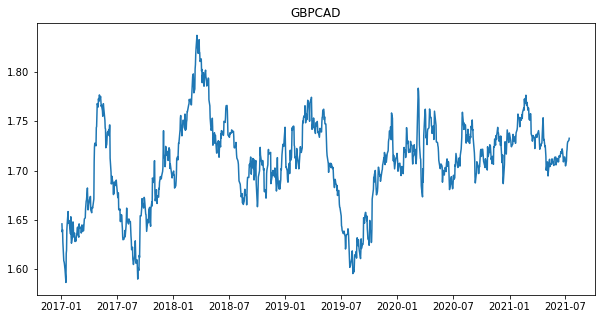

In [129]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXGBPCAD'])
plt.title('GBPCAD')
plt.show()

### JPYCAD

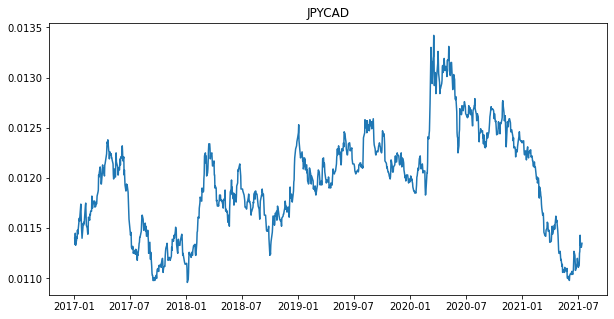

In [130]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXJPYCAD'])
plt.title('JPYCAD')
plt.show()

### NZDCAD

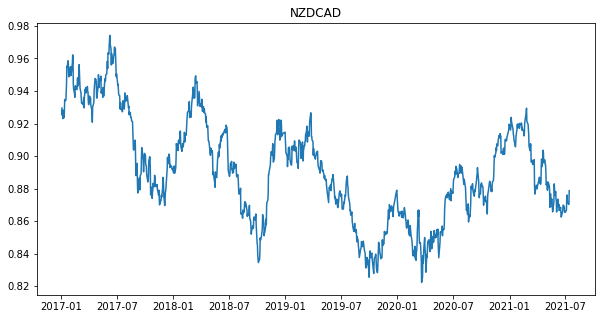

In [131]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXNZDCAD'])
plt.title('NZDCAD')
plt.show()

### Selected FX Rates vs US Dollar

In [148]:
fx_vs_usd=pd.DataFrame()
fx_vs_usd['AUDUSD'] = fx_rates_df['FXAUDCAD'] / fx_rates_df['FXUSDCAD']
fx_vs_usd['EURUSD'] = fx_rates_df['FXEURCAD'] / fx_rates_df['FXUSDCAD']
fx_vs_usd['GBPUSD'] = fx_rates_df['FXGBPCAD'] / fx_rates_df['FXUSDCAD']
fx_vs_usd['USDJPY'] = fx_rates_df['FXUSDCAD'] / fx_rates_df['FXJPYCAD']
fx_vs_usd['NZDUSD'] = fx_rates_df['FXNZDCAD'] / fx_rates_df['FXUSDCAD']

### AUDUSD 

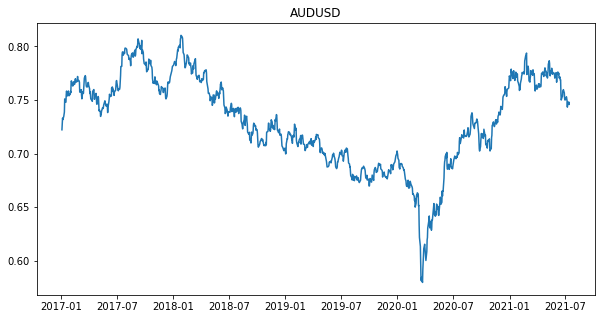

In [149]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_vs_usd['AUDUSD'])
plt.title('AUDUSD')
plt.show()

### EURUSD

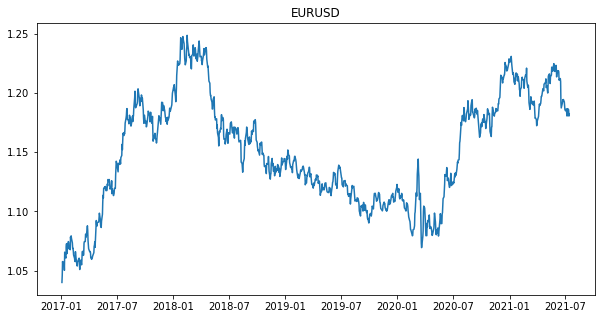

In [150]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_vs_usd['EURUSD'])
plt.title('EURUSD')
plt.show()

### GBPUSD

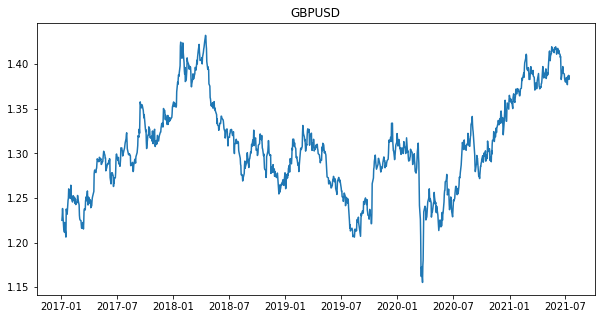

In [151]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_vs_usd['GBPUSD'])
plt.title('GBPUSD')
plt.show()

### USDJPY

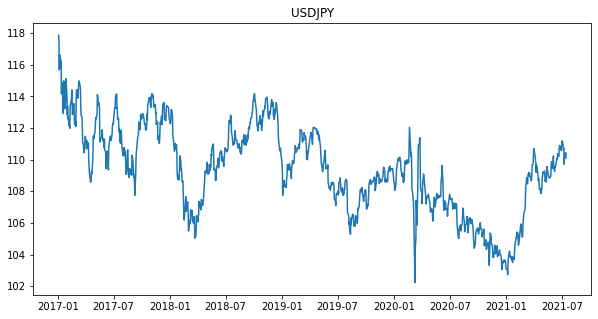

In [152]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_vs_usd['USDJPY'])
plt.title('USDJPY')
plt.show()

### NZDUSD

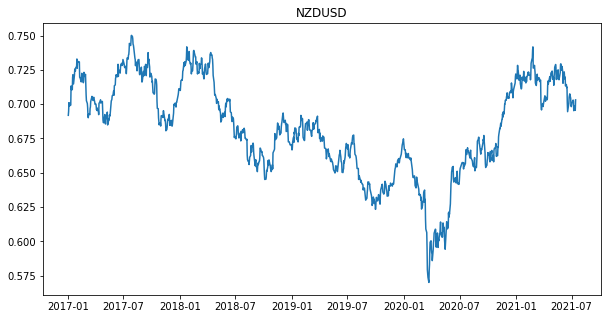

In [153]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_vs_usd['NZDUSD'])
plt.title('NZDUSD')
plt.show()

### Money Market Yields Data

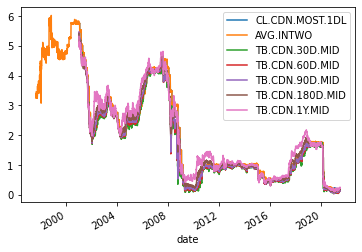

In [91]:
money_market_df=pd.read_csv(Path("money_market.csv"), index_col = "date", infer_datetime_format=True, parse_dates=True, skiprows = 23)
money_market_df.plot()

### Selected Bond Yields Data

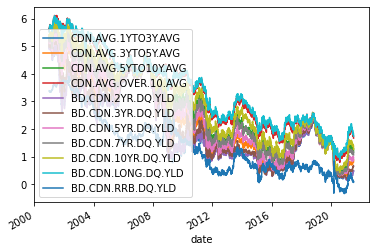

In [92]:
bond_yields_df=pd.read_csv(Path("bond_yields_all.csv"), index_col = "date", infer_datetime_format=True, parse_dates=True, skiprows = 27)
bond_yields_df.plot()

### Selected Treasury Bill Yields Data

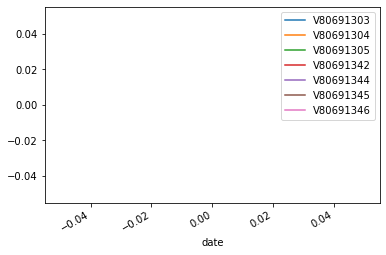

In [93]:
tbill_all_df=pd.read_csv(Path("tbill_all.csv"), index_col = "date", infer_datetime_format=True, parse_dates=True, skiprows = 23)
tbill_all_df.dropna().tail(100).plot()

## Set the Start Dayte

In [94]:
start_date='20191901'
print(start_date)

20191901


# 2. Analysis

## Canadian Overnight Repo Rate Average (CORRA)

## Securities Repo Operations (SRO)

In [95]:
sro_df.tail()

,sr_id,SR_MATURITY_DATE,SR_OFFERED_AMOUNT,SR_TOTAL_ALLOCATED_AMOUNT,SR_ALLOCATED_AMOUNT,SR_SEC_MATURITY_DATE,SR_ISIN,SR_COUPON_RATE,SR_MAX_REPO_RATE,SR_LOW_REPO_RATE,SR_AVG_REPO_RATE,SR_HIGH_REPO_RATE,SR_SECURITY_TYPE
SR_OPERATION_DATE,,,,,,,,,,,,,
2020-07-27,2020-07-27_2020-07-28_CA1350Z77Q13,2020-07-28,NaN,NaN,5.0,2021-01-14,CA1350Z77Q13,NaN,NaN,NaN,0.1,NaN,Treasury Bill
2020-07-27,2020-07-27_2020-07-28_CA1350Z77R95,2020-07-28,NaN,NaN,19.0,2021-07-15,CA1350Z77R95,NaN,NaN,NaN,0.1,NaN,Treasury Bill
2020-07-27,2020-07-27_2020-07-28_CA135087B451,2020-07-28,NaN,NaN,1.0,2024-06-01,CA135087B451,2.50,NaN,NaN,0.1,NaN,Bond
2020-07-27,2020-07-27_2020-07-28_CA135087K528,2020-07-28,NaN,NaN,177.0,2025-03-01,CA135087K528,1.25,NaN,NaN,0.1,NaN,Bond
2020-07-27,2020-07-27_2020-07-28,2020-07-28,5500.0,202.0,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN


In [96]:
sro_new = sro_df.drop(columns=['sr_id', 'SR_MATURITY_DATE',
                              'SR_ALLOCATED_AMOUNT',
                              'SR_SEC_MATURITY_DATE',
                              'SR_ISIN',
                              'SR_COUPON_RATE',
                              'SR_LOW_REPO_RATE',
                              'SR_AVG_REPO_RATE',
                              'SR_HIGH_REPO_RATE',
                              'SR_SECURITY_TYPE',
                              'SR_MAX_REPO_RATE']).dropna().sort_values(by='SR_OPERATION_DATE', ascending=True).reset_index()

sro=sro_new.rename(columns={'SR_OPERATION_DATE': 'Date', 'SR_OFFERED_AMOUNT': 'Amount Offered', 'SR_TOTAL_ALLOCATED_AMOUNT': 'Amount Allocated'}).set_index('Date')
sro.tail()

,Amount Offered,Amount Allocated
Date,,
2021-07-05,44000.0,28865.0
2021-07-06,44000.0,30363.0
2021-07-07,44000.0,27952.0
2021-07-08,44000.0,27633.0
2021-07-09,44000.0,25841.0


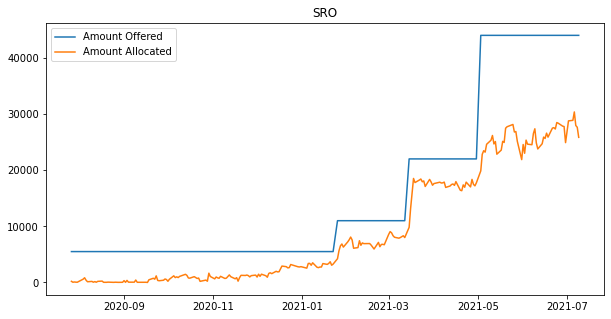

In [97]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(sro)
# plt.plot(corra_rates['Corra'], linewidth = 5)
plt.title('SRO')
plt.legend(sro)
plt.show()

In [98]:
sro_util=pd.DataFrame()
sro_util['SRO % Utilisation'] = sro['Amount Allocated'] / sro['Amount Offered']
sro_util['5-Day Moving Average'] = sro_util['SRO % Utilisation'].rolling(window=5).mean()
sro_util.tail()

,SRO % Utilisation,5-Day Moving Average
Date,,
2021-07-05,0.656023,0.627895
2021-07-06,0.690068,0.639382
2021-07-07,0.635273,0.640245
2021-07-08,0.628023,0.652668
2021-07-09,0.587295,0.639336


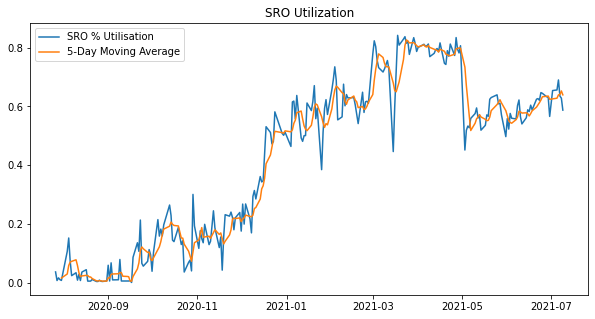

In [99]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(sro_util)
# plt.plot(corra_rates['Corra'], linewidth = 5)
plt.title('SRO Utilization')
plt.legend(sro_util)
plt.show()

In [100]:
sro_max_rate = pd.DataFrame()
sro_max_rate=sro_df.drop(columns=['sr_id', 'SR_MATURITY_DATE',
                                  'SR_OFFERED_AMOUNT', 'SR_TOTAL_ALLOCATED_AMOUNT',
                              'SR_ALLOCATED_AMOUNT',
                              'SR_SEC_MATURITY_DATE',
                              'SR_ISIN',
                              'SR_COUPON_RATE',
                              'SR_LOW_REPO_RATE',
                              'SR_AVG_REPO_RATE',
                              'SR_HIGH_REPO_RATE',
                              'SR_SECURITY_TYPE'
                              ]).dropna().sort_values(by='SR_OPERATION_DATE', ascending=True).reset_index()

sro_max_rate=sro_max_rate.rename(columns={'SR_OPERATION_DATE': 'Date', 'SR_MAX_REPO_RATE': 'SRO Max Rate'}).set_index('Date')

sro_max_rate.tail()

,SRO Max Rate
Date,
2021-07-05,0.15
2021-07-06,0.15
2021-07-07,0.15
2021-07-08,0.15
2021-07-09,0.15


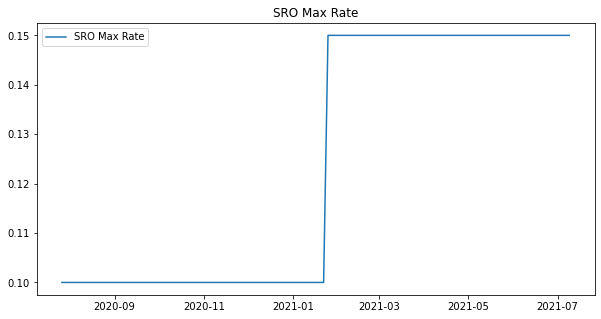

In [101]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(sro_max_rate)
# plt.plot(corra_rates['Corra'], linewidth = 5)
plt.title('SRO Max Rate')
plt.legend(sro_max_rate)
plt.show()

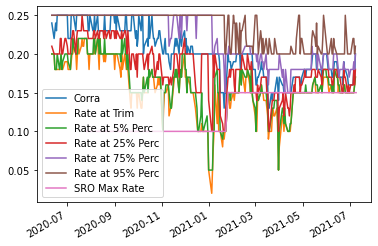

In [102]:
corra_sro = pd.concat([corra_rates, sro_max_rate], axis = 1, join = 'outer')
corra_sro.plot()

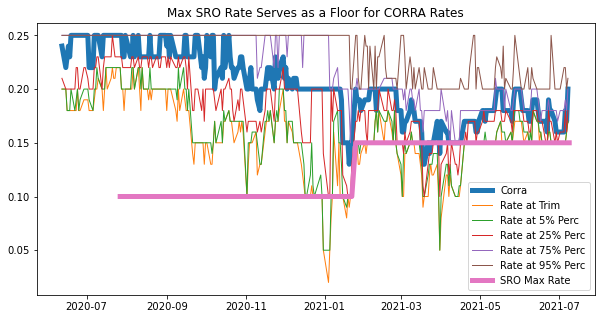

In [103]:
plt.figure(figsize=(10,5))
ax = plt.axes()
# plt.plot(corra_sro)
plt.plot(corra_sro['Corra'], linewidth = 5)
plt.plot(corra_sro['Rate at Trim'], linewidth = 1)
plt.plot(corra_sro['Rate at 5% Perc'], linewidth = 1)
plt.plot(corra_sro['Rate at 25% Perc'], linewidth = 1)
plt.plot(corra_sro['Rate at 75% Perc'], linewidth = 1)
plt.plot(corra_sro['Rate at 95% Perc'], linewidth = 1)
plt.plot(corra_sro['SRO Max Rate'], linewidth = 5)
plt.title('Max SRO Rate Serves as a Floor for CORRA Rates')
plt.legend(corra_sro)
plt.show()

In [104]:
money_market_df.tail()

,CL.CDN.MOST.1DL,AVG.INTWO,TB.CDN.30D.MID,TB.CDN.60D.MID,TB.CDN.90D.MID,TB.CDN.180D.MID,TB.CDN.1Y.MID
date,,,,,,,
2021-07-02,0.1999,0.16,0.14,0.13,0.14,0.17,0.22
2021-07-05,0.1828,0.16,0.14,0.14,0.15,0.17,0.24
2021-07-06,0.1665,0.18,0.15,0.14,0.15,0.19,0.24
2021-07-07,0.1714,0.17,0.16,0.15,0.16,0.19,0.25
2021-07-08,NaN,0.20,0.17,0.14,0.14,0.18,0.24


In [105]:
mm=money_market_df.drop(columns=['CL.CDN.MOST.1DL'])

mm=mm.rename(columns={'AVG.INTWO': 'Corra', 'TB.CDN.30D.MID': '1M T-Bills', 
                      'TB.CDN.60D.MID': '2M T-Bills','TB.CDN.90D.MID': '3M T-Bills',
                      'TB.CDN.180D.MID': '6M T-Bills','TB.CDN.1Y.MID': '1Y T-Bills'})

mm.tail()

,Corra,1M T-Bills,2M T-Bills,3M T-Bills,6M T-Bills,1Y T-Bills
date,,,,,,
2021-07-02,0.16,0.14,0.13,0.14,0.17,0.22
2021-07-05,0.16,0.14,0.14,0.15,0.17,0.24
2021-07-06,0.18,0.15,0.14,0.15,0.19,0.24
2021-07-07,0.17,0.16,0.15,0.16,0.19,0.25
2021-07-08,0.20,0.17,0.14,0.14,0.18,0.24


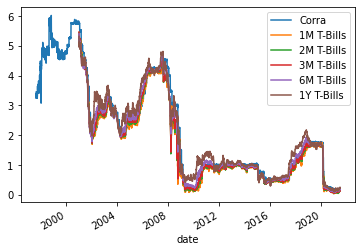

In [106]:
mm.plot()

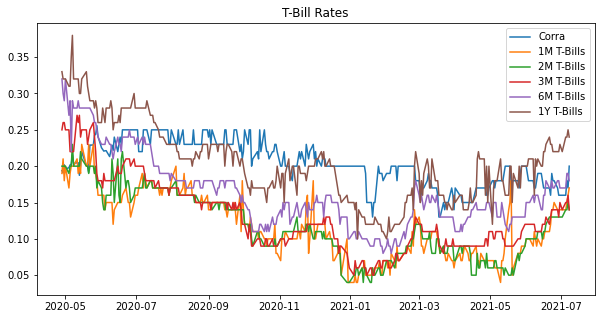

In [107]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(mm.tail(300))
plt.title('T-Bill Rates')
plt.legend(mm)
plt.show()

In [108]:
onr=money_market_df.drop(columns=['TB.CDN.30D.MID', 
                      'TB.CDN.60D.MID','TB.CDN.90D.MID',
                      'TB.CDN.180D.MID','TB.CDN.1Y.MID'])

onr=onr.rename(columns={'AVG.INTWO': 'Corra', 'CL.CDN.MOST.1DL': 'O/N Money Market Financing Rate'})

onr.tail(50)

,O/N Money Market Financing Rate,Corra
date,,
2021-04-28,0.1681,0.16
2021-04-29,0.1710,0.16
2021-04-30,0.1637,0.17
2021-05-03,0.1706,0.18
2021-05-04,0.1799,0.18
2021-05-05,0.1725,0.17
2021-05-06,0.1757,0.18
2021-05-07,0.1713,0.18
2021-05-10,0.1641,0.18


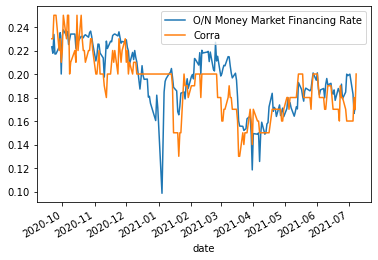

In [109]:
onr.tail(200).plot()

In [110]:
bond_yields_df.tail()

,CDN.AVG.1YTO3Y.AVG,CDN.AVG.3YTO5Y.AVG,CDN.AVG.5YTO10Y.AVG,CDN.AVG.OVER.10.AVG,BD.CDN.2YR.DQ.YLD,BD.CDN.3YR.DQ.YLD,BD.CDN.5YR.DQ.YLD,BD.CDN.7YR.DQ.YLD,BD.CDN.10YR.DQ.YLD,BD.CDN.LONG.DQ.YLD,BD.CDN.RRB.DQ.YLD
date,,,,,,,,,,,
2021-07-02,0.44,0.86,1.27,1.77,0.45,0.65,0.96,1.14,1.37,1.84,0.11
2021-07-05,0.46,0.89,1.30,1.77,0.46,0.67,0.99,1.17,1.40,1.84,0.11
2021-07-06,0.46,0.85,1.23,1.72,0.46,0.66,0.95,1.12,1.32,1.79,0.06
2021-07-07,0.47,0.84,1.21,1.69,0.48,0.66,0.93,1.10,1.29,1.76,0.07
2021-07-08,0.47,0.81,1.17,1.67,0.48,0.65,0.89,1.06,1.26,1.74,0.08


In [111]:
by=bond_yields_df.drop(columns=['CDN.AVG.1YTO3Y.AVG','CDN.AVG.3YTO5Y.AVG', 'CDN.AVG.5YTO10Y.AVG', 'CDN.AVG.OVER.10.AVG', 'BD.CDN.LONG.DQ.YLD', 'BD.CDN.RRB.DQ.YLD'])

by=by.rename(columns={'BD.CDN.2YR.DQ.YLD': '2Y', 'BD.CDN.3YR.DQ.YLD': '3Y', 
                      'BD.CDN.5YR.DQ.YLD': '5Y','BD.CDN.7YR.DQ.YLD': '7Y',
                      'BD.CDN.10YR.DQ.YLD': '10Y'})

by.tail()

,2Y,3Y,5Y,7Y,10Y
date,,,,,
2021-07-02,0.45,0.65,0.96,1.14,1.37
2021-07-05,0.46,0.67,0.99,1.17,1.40
2021-07-06,0.46,0.66,0.95,1.12,1.32
2021-07-07,0.48,0.66,0.93,1.10,1.29
2021-07-08,0.48,0.65,0.89,1.06,1.26


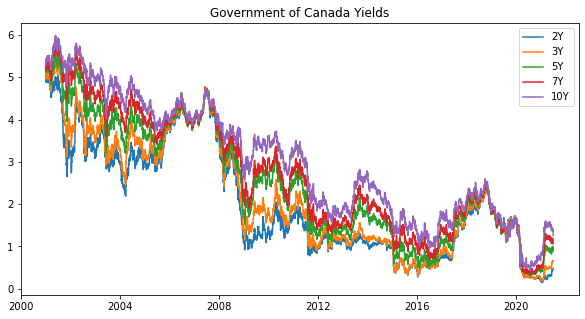

In [112]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(by)
plt.title('Government of Canada Yields')
plt.legend(by)
plt.show()

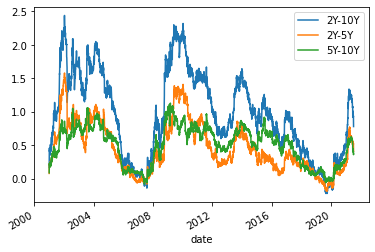

In [113]:
curve = pd.DataFrame()
curve['2Y-10Y'] = by['10Y'] - by['2Y']
curve['2Y-5Y'] = by['5Y'] - by['2Y']
curve['5Y-10Y'] = by['10Y'] - by['5Y']
curve.plot()

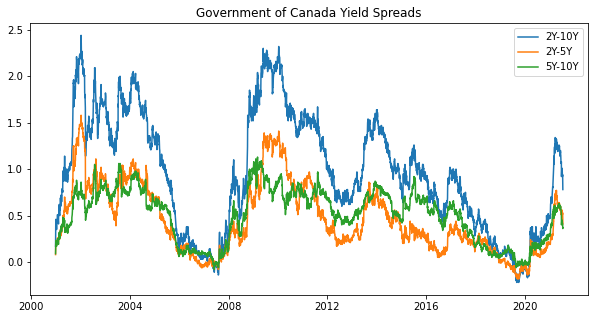

In [114]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(curve)
plt.title('Government of Canada Yield Spreads')
plt.legend(curve)
plt.show()